# Exploratory Data Analysis

### Summary of tasks covered
1. Importing and analysing data present with charts and graphs
2. Feature selection and encoding categorical variables
3. Train basic random forest to test out

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [311]:
data = pd.read_csv('../data/bank.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [312]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [314]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Target Variable Distribution (%):
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


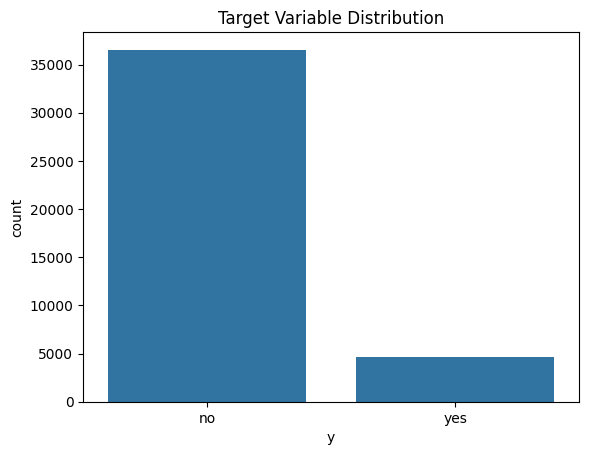

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
target_distribution = data['y'].value_counts(normalize=True) * 100
print("\nTarget Variable Distribution (%):")
print(target_distribution)

# Plotting target variable distribution
sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution")
plt.show()


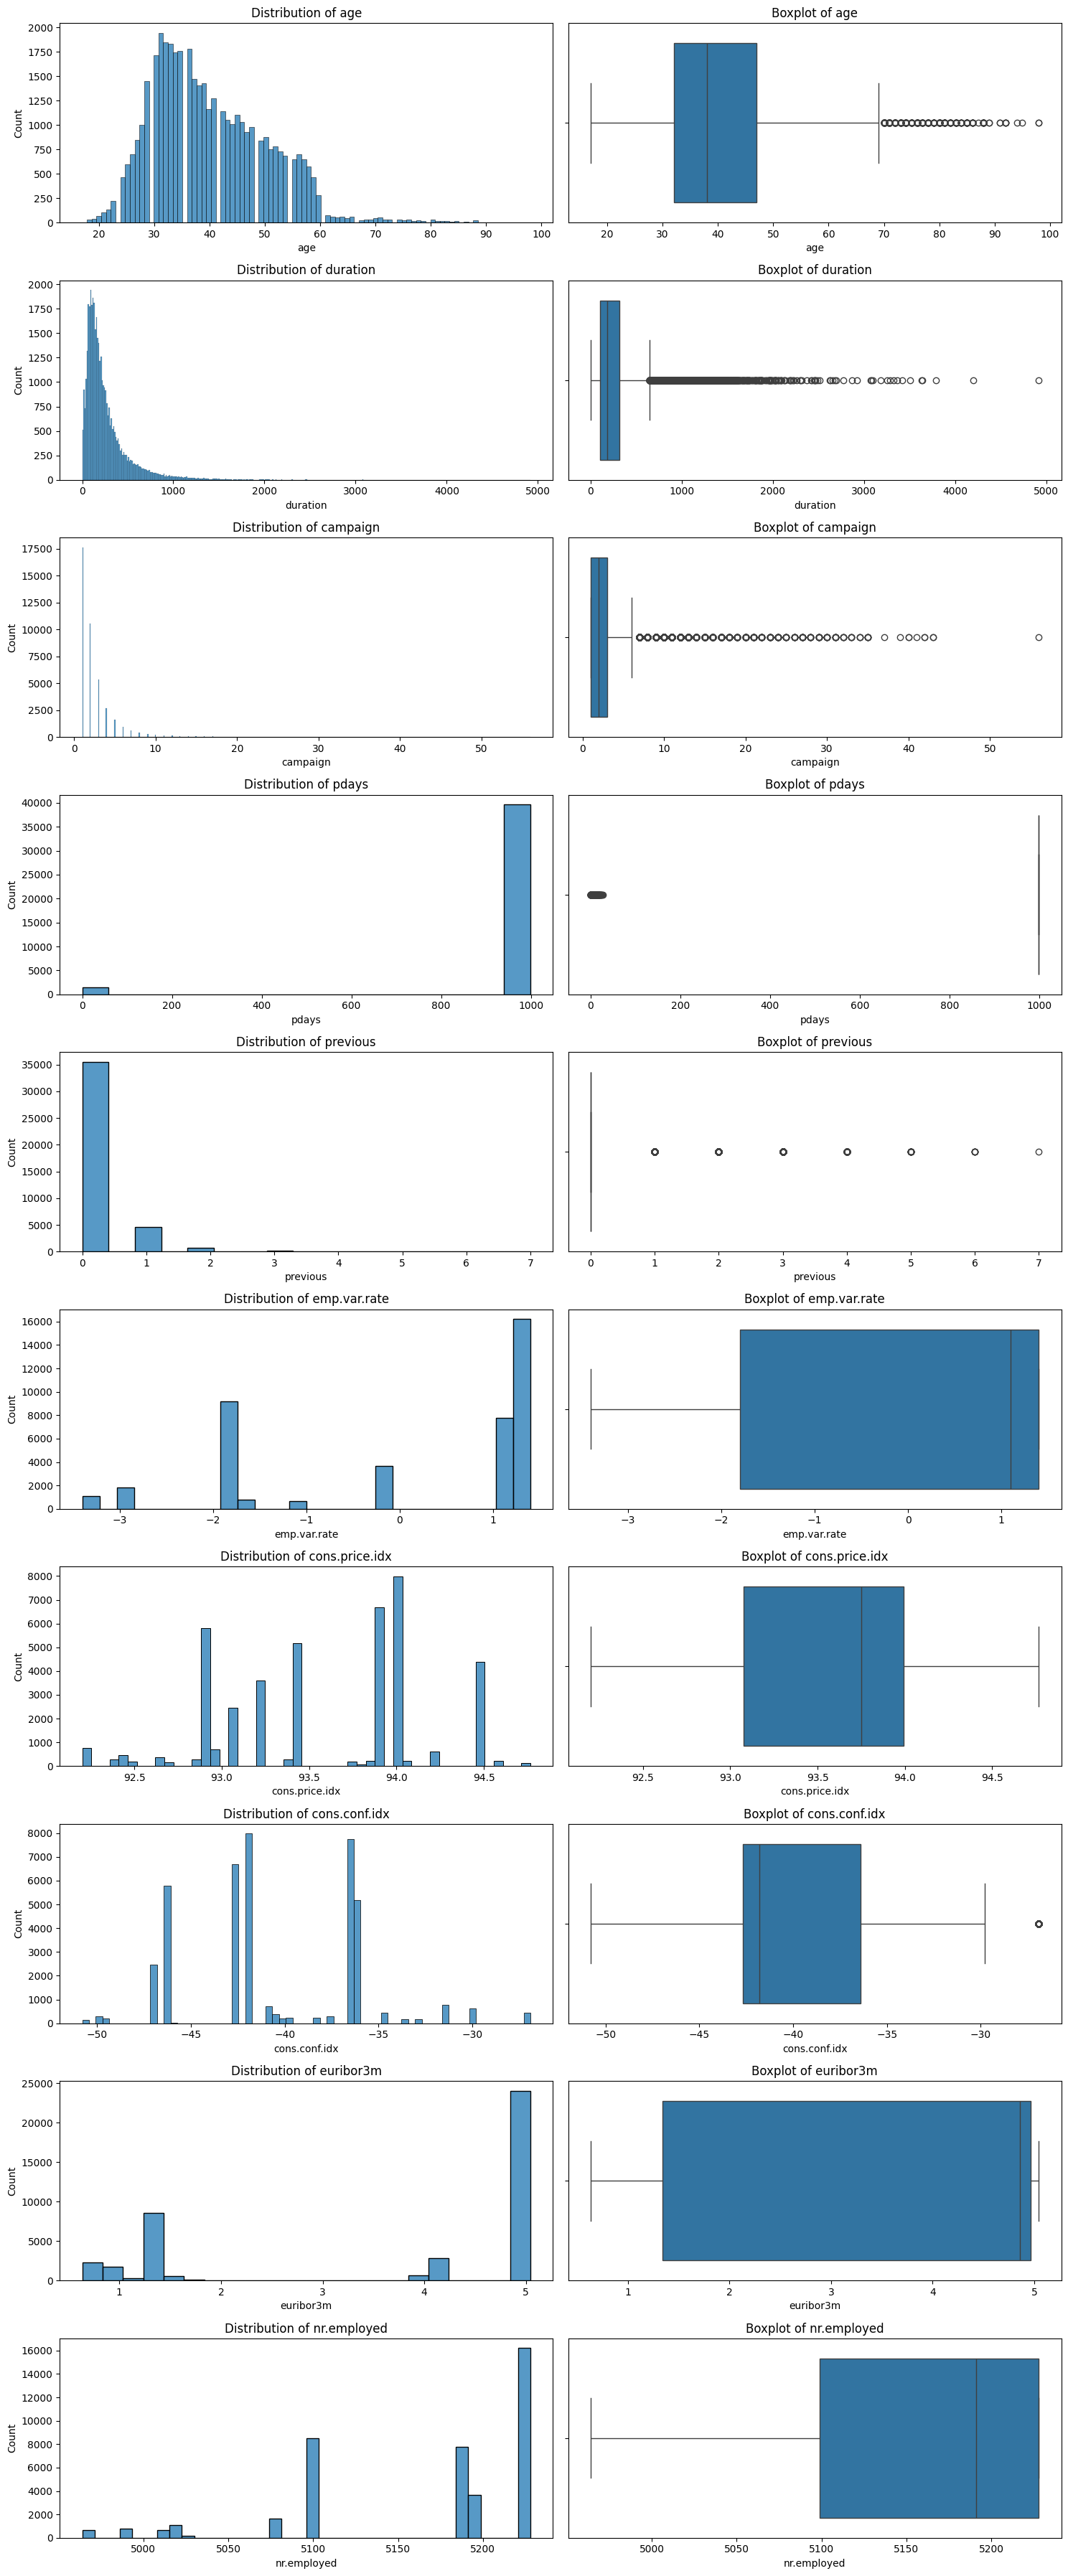

In [316]:
# Selecting numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns


# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 36))

# Visualizing distributions
for i, feature in enumerate(numerical_features):
    sns.histplot(x=data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")
    sns.boxplot(x=data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {feature}")

    
plt.tight_layout()
plt.show()


In [317]:
# Drop duplicates
duplicates = data.duplicated()
print(duplicates.sum())
data.drop_duplicates(inplace=True)

12


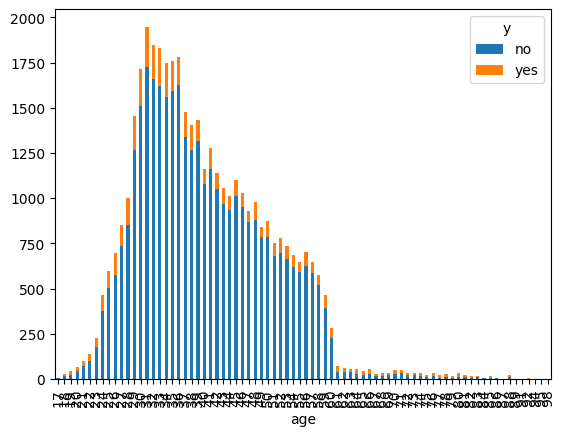

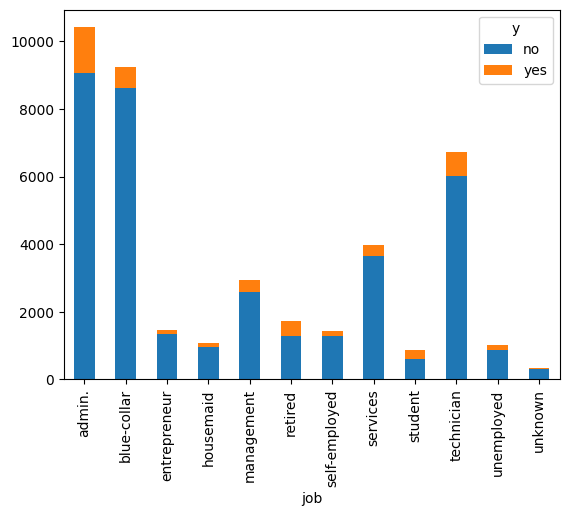

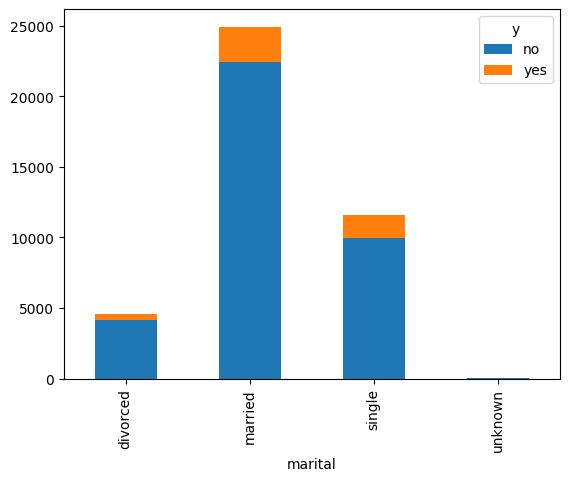

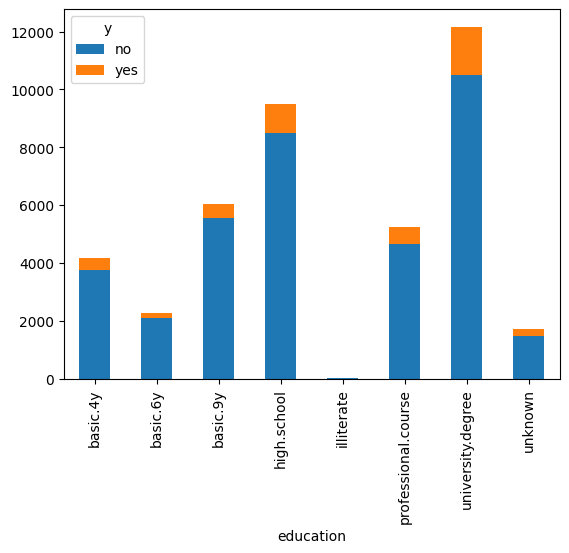

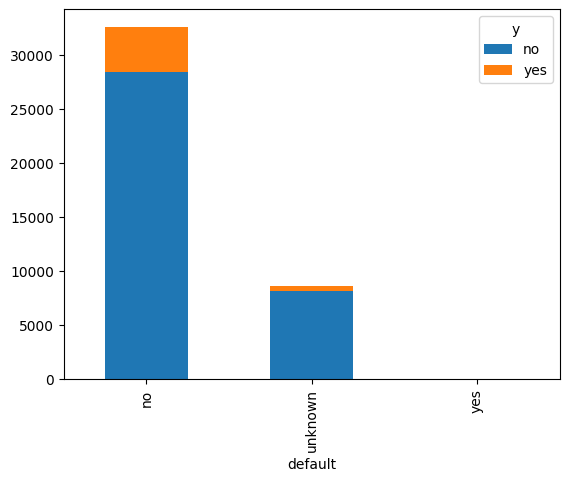

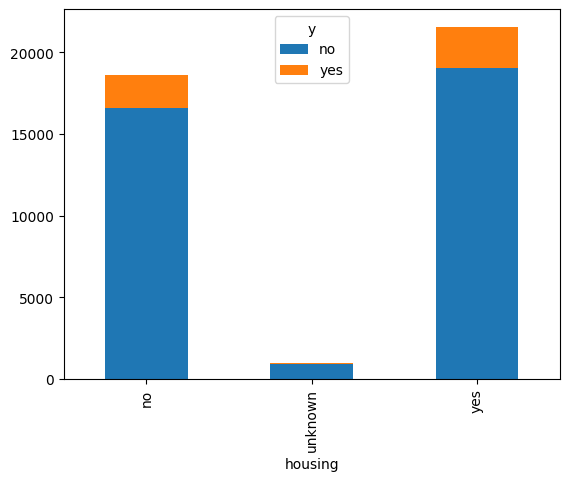

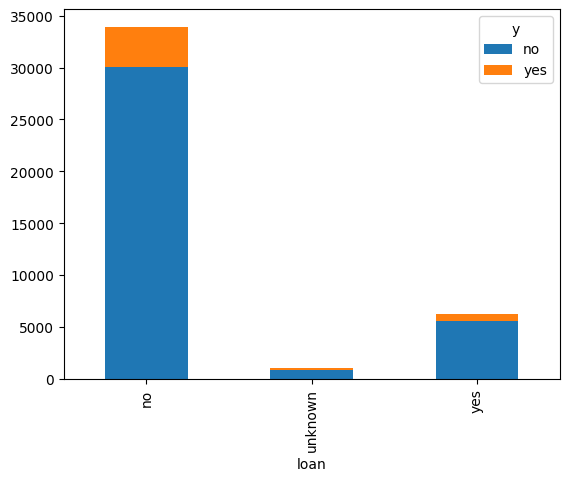

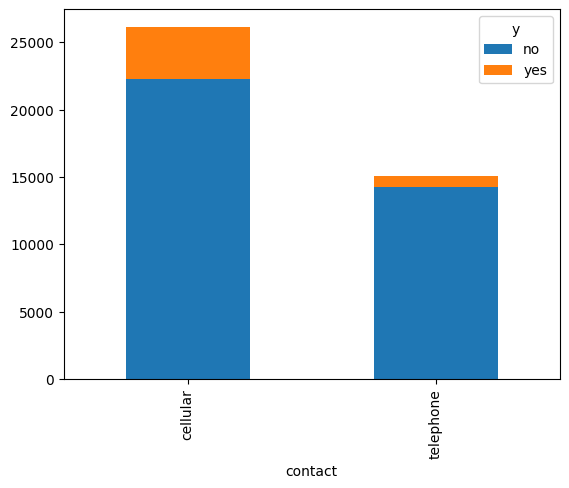

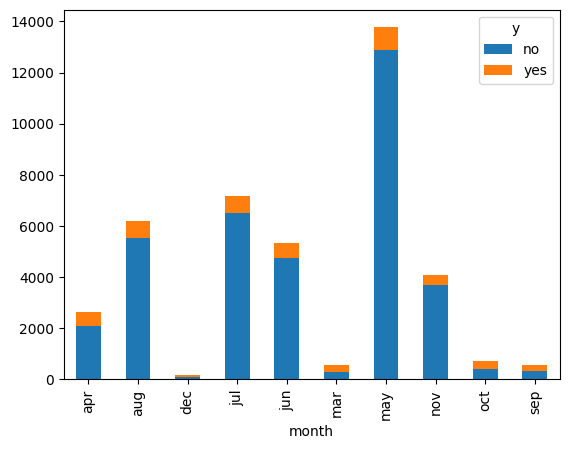

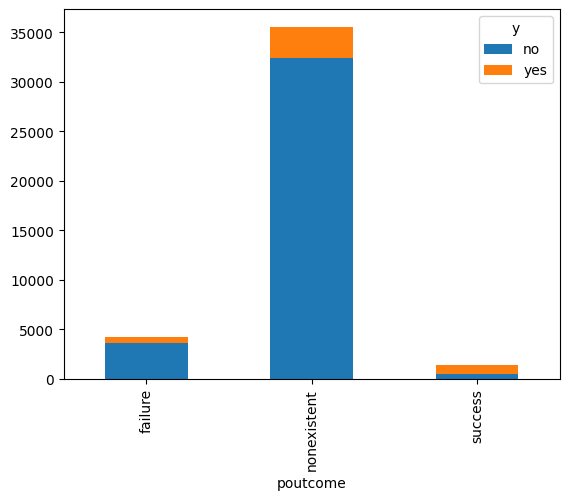

In [318]:
for i in ['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome']:
    data.groupby([i, 'y']).size().unstack().plot(kind='bar', stacked=True)

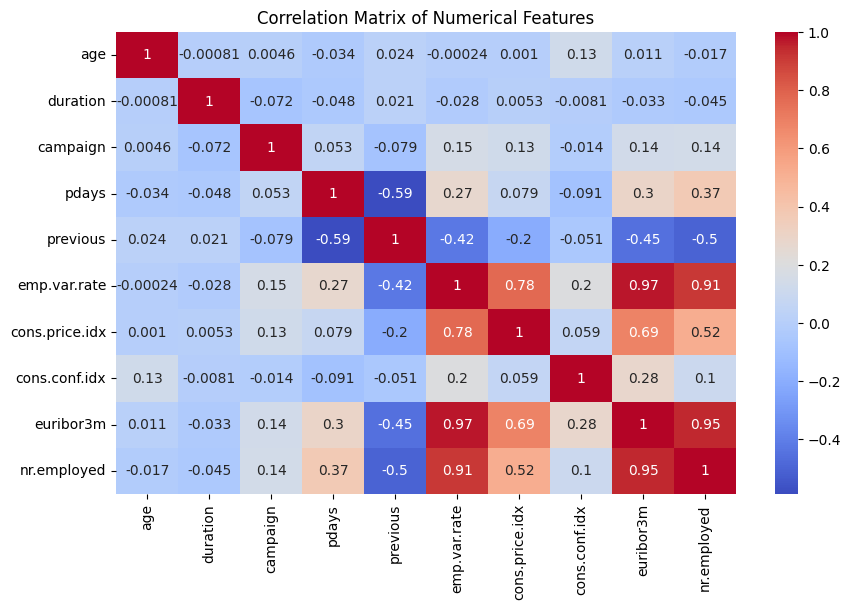


Chi-Square Test for Categorical Features:
job: p-value = 3.2684116066165443e-199
marital: p-value = 1.7784225004611415e-26
education: p-value = 3.746768377534744e-38
default: p-value = 5.217540893727963e-89
housing: p-value = 0.056637927494525425
loan: p-value = 0.5771532081176227
contact: p-value = 1.7187406241263767e-189
month: p-value = 0.0
day_of_week: p-value = 3.085754965631742e-05
poutcome: p-value = 0.0


In [319]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Chi-square test for categorical features vs target variable
from scipy.stats import chi2_contingency

print("\nChi-Square Test for Categorical Features:")
for feature in categorical_features:
    if feature != 'y':  # Exclude target variable
        contingency_table = pd.crosstab(data[feature], data['y'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"{feature}: p-value = {p}")


                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017404 -0.044646  0.144046  0.372368 -0.501200   
y_encoded       0.030381  0.405297 -0.066361 -0.324948  0.230202   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941       

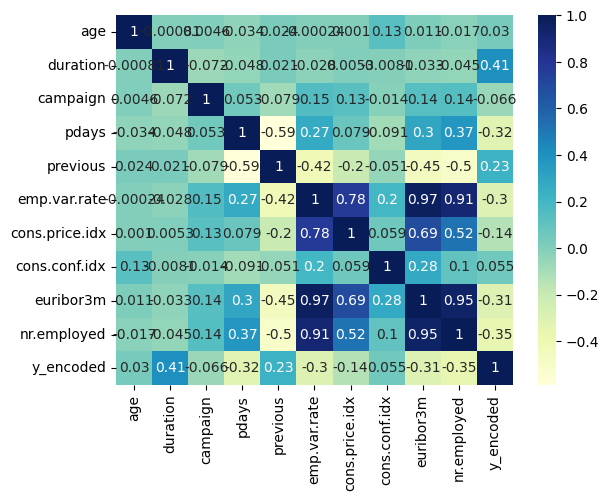

In [320]:
# Using ordinal encoding for y
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['no','yes']])
data['y_encoded'] = encoder.fit_transform(data[['y']])
print(data.corr(numeric_only=True))
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu', annot=True)

In [321]:
data = data.drop(['campaign','cons.conf.idx','emp.var.rate','euribor3m'],axis=1)

## Encoding categorical variables

Test encoding in different methods

One hot encoding: marital, poutcome, contact

Frequency encoding: job

Binary encoding: loan, housing, default, y

Ordinal encoding: education

sin/cosine encoding: month, day_of_week

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41176 non-null  int64  
 1   duration              41176 non-null  int64  
 2   pdays                 41176 non-null  int64  
 3   previous              41176 non-null  int64  
 4   cons.price.idx        41176 non-null  float64
 5   nr.employed           41176 non-null  int64  
 6   y_encoded             41176 non-null  float64
 7   job_freq_encode       41176 non-null  float64
 8   education_encoded     41176 non-null  float64
 9   month_sin             41176 non-null  float64
 10  month_cos             41176 non-null  float64
 11  day_sin               41176 non-null  float64
 12  day_cos               41176 non-null  float64
 13  loan_0                41176 non-null  int64  
 14  loan_1                41176 non-null  int64  
 15  housing_0             41

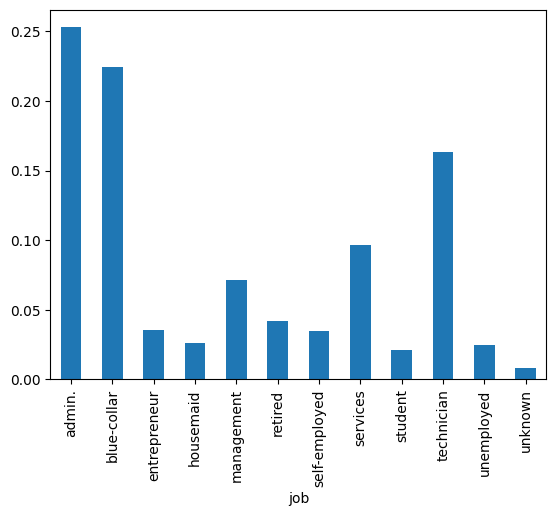

In [322]:
# Using dummy encoding to encode marital, poutcome, contact
to_dummy_cols = pd.DataFrame(data[['marital', 'poutcome','contact']])
dummy_cols = pd.get_dummies(to_dummy_cols)

# Replace the 999 for no days visited with 0
data['pdays'] = data['pdays'].replace(999, 0)

# Using binary encoding for loan, housing, default, y
from category_encoders import BinaryEncoder 
encoder = BinaryEncoder(cols =['loan', 'housing', 'default']) 
# Transforming the column after fitting
newdata = encoder.fit_transform(data[['loan', 'housing', 'default']])

# Using frequency encoding for job
fq = data.groupby('job').size()/len(data)
# Mapping values to dataframe
data.loc[:, "{}_freq_encode".format('job')] = data['job'].map(fq)
fq.plot.bar(stacked=True)

# Using ordinal encoding for education
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["illiterate","unknown","basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree"]])
data['education_encoded'] = encoder.fit_transform(data[['education']])

# Sin/cosine encoding for month, day_of_week
# Map categorical values to numerical values
month_mapping = {month: i+1 for i, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                       'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])}
day_mapping = {day: i+1 for i, day in enumerate(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])}

data['month_num'] = data['month'].map(month_mapping)
data['day_num'] = data['day_of_week'].map(day_mapping)

# Sine and Cosine Encoding
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day_num'] / 7)
data['day_cos'] = np.cos(2 * np.pi * data['day_num'] / 7)


# concatenating dataframe
data = pd.concat([data, newdata, dummy_cols], axis = 1) 
# dropping old column 
data = data.drop(['loan', 'housing', 'default','y','marital', 'poutcome','contact','job','month', 'day_of_week', 'month_num', 'day_num','education'], axis = 1)

data.info()

                           age  duration     pdays  previous  cons.price.idx  \
age                   1.000000 -0.000808  0.018140  0.024379        0.001009   
duration             -0.000808  1.000000  0.047835  0.020600        0.005303   
pdays                 0.018140  0.047835  1.000000  0.485176       -0.041809   
previous              0.024379  0.020600  0.485176  1.000000       -0.203197   
cons.price.idx        0.001009  0.005303 -0.041809 -0.203197        1.000000   
nr.employed          -0.017404 -0.044646 -0.322913 -0.501200        0.522363   
y_encoded             0.030381  0.405297  0.267115  0.230202       -0.136134   
job_freq_encode      -0.170764 -0.005460 -0.031645 -0.042580        0.021305   
education_encoded    -0.184601 -0.016151  0.013622  0.020970       -0.098283   
month_sin            -0.066111  0.025520 -0.044723  0.024332       -0.014551   
month_cos             0.081967 -0.004825  0.092195  0.177064       -0.389035   
day_sin               0.014024 -0.002439

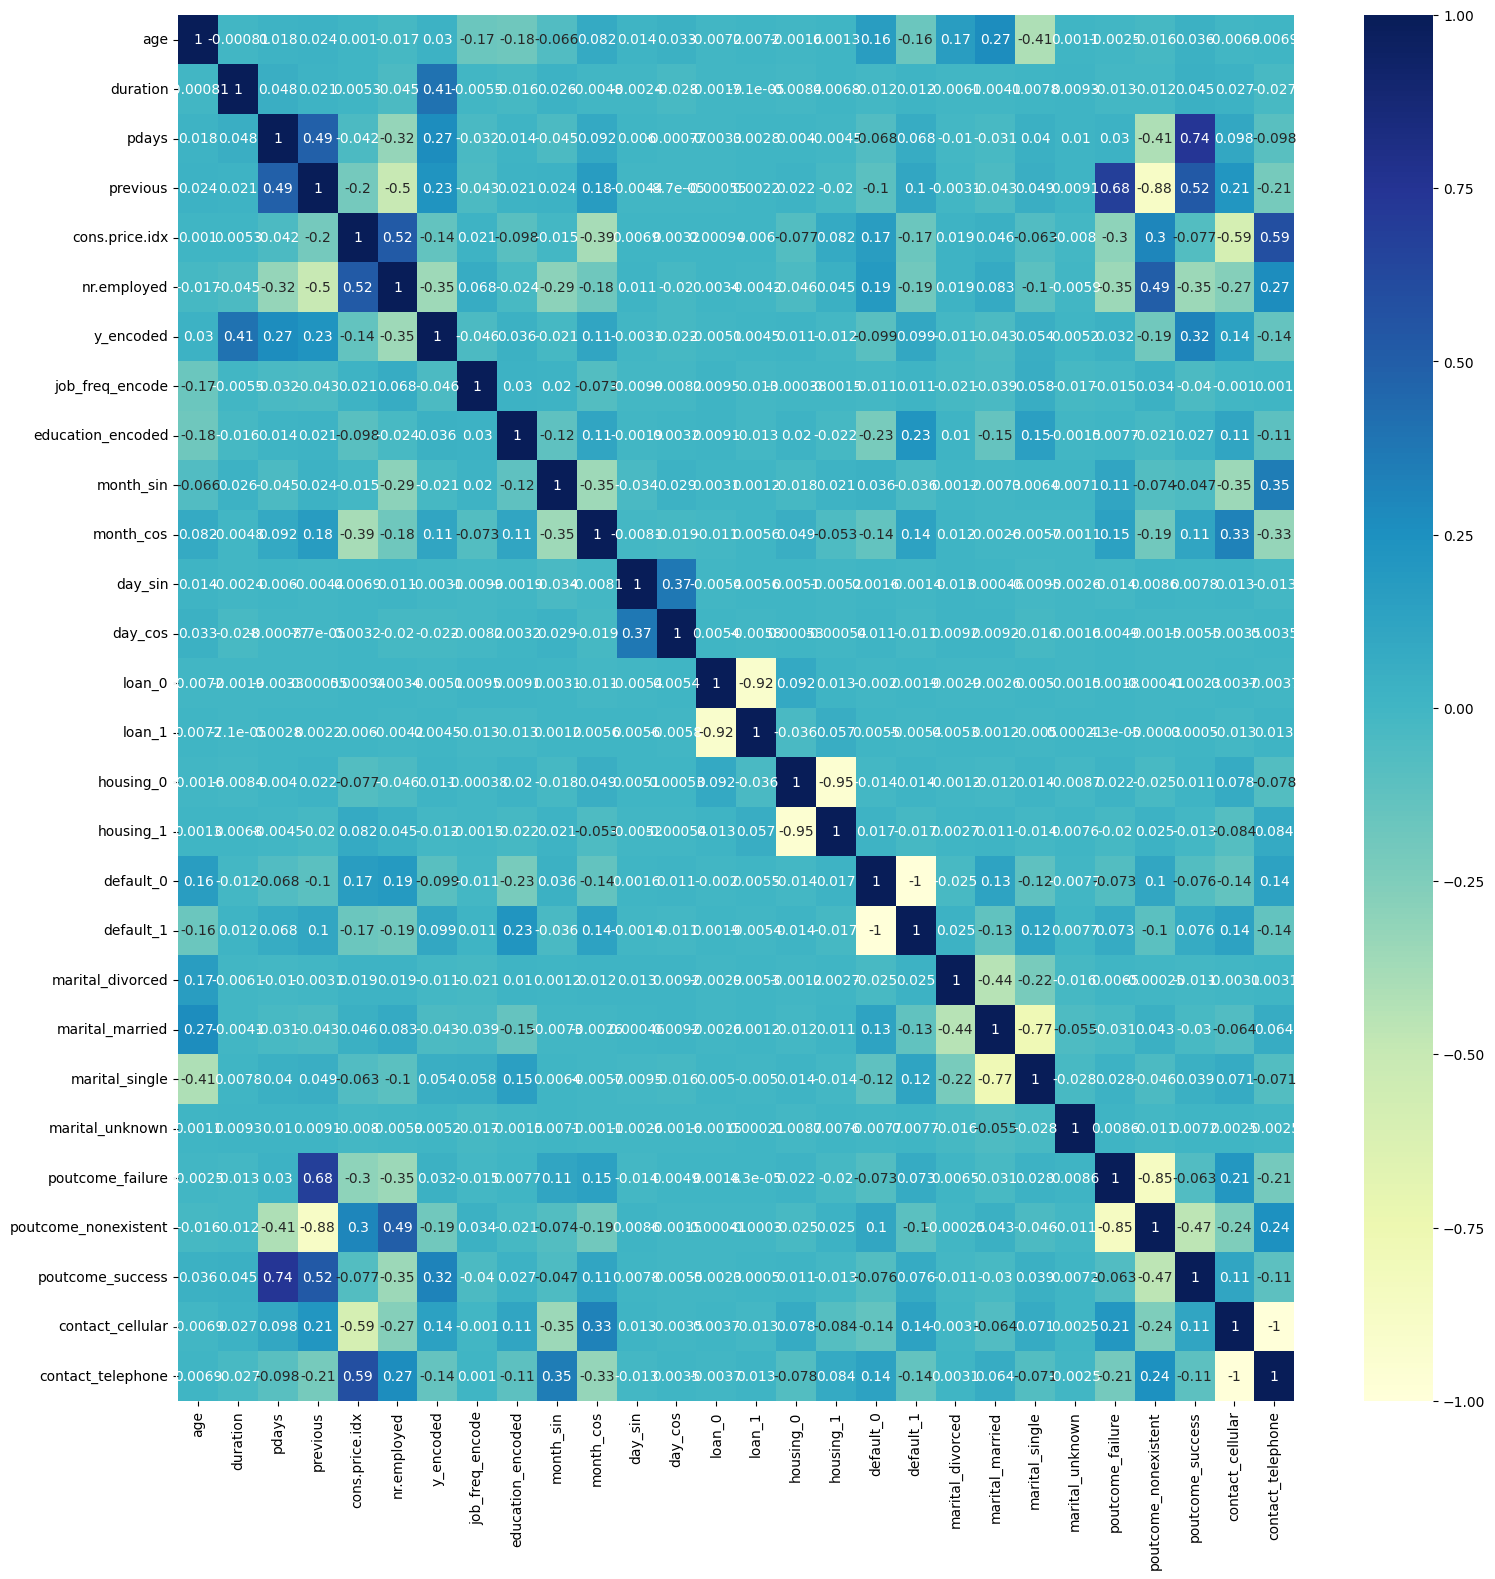

In [323]:
print(data.corr(numeric_only=True))
plt.figure(figsize=(18,18))
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu', annot=True)

In [324]:
X = data.drop(['y_encoded', ], axis=1)
y = data[['y_encoded']]